# %B Indicator

https://stockcharts.com/school/doku.php?id=chart_school:technical_indicators:bollinger_band_perce

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import warnings
warnings.filterwarnings("ignore")

# fix_yahoo_finance is used to fetch data 
import yfinance as yf
yf.pdr_override()

In [2]:
# input
symbol = 'AAPL'
start = '2018-12-01'
end = '2019-04-01'

# Read data 
df = yf.download(symbol,start,end)

# View Columns
df.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-12-03,184.460007,184.940002,181.210007,184.820007,181.653076,40802500
2018-12-04,180.949997,182.389999,176.270004,176.690002,173.662369,41344300
2018-12-06,171.759995,174.779999,170.419998,174.720001,171.726135,43098400
2018-12-07,173.490005,174.490005,168.300003,168.490005,165.602905,42281600
2018-12-10,165.000000,170.089996,163.330002,169.600006,166.693863,62026000


In [3]:
import talib as ta

upper, middle, lower = ta.BBANDS(df['Adj Close'])

In [4]:
# Create %B Indicator
df['BI'] = (df['Adj Close'] - lower)/(upper - lower)

In [5]:
df = df.dropna()
df.head()

,Open,High,Low,Close,Adj Close,Volume,BI
Date,,,,,,,
2018-12-10,165.000000,170.089996,163.330002,169.600006,166.693863,62026000,0.274846
2018-12-11,171.660004,171.789993,167.000000,168.630005,165.740494,47281700,0.280336
2018-12-12,170.399994,171.919998,169.020004,169.100006,166.202438,35627700,0.392247
2018-12-13,170.490005,172.570007,169.550003,170.949997,168.020721,31898600,0.949314
2018-12-14,169.000000,169.080002,165.279999,165.479996,162.644440,40703700,0.048228


Text(0.5, 0, 'Date')

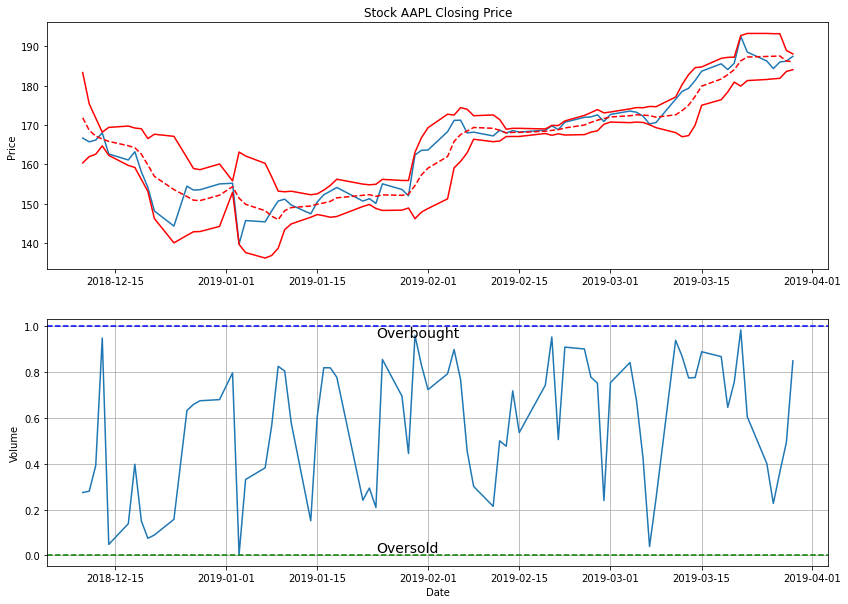

In [6]:
fig = plt.figure(figsize=(14,10))
ax1 = plt.subplot(2, 1, 1)
ax1.plot(df['Adj Close'])
ax1.plot(upper, color='red')
ax1.plot(middle, color='red', linestyle='--')
ax1.plot(lower, color='red')
ax1.set_title('Stock '+ symbol +' Closing Price')
ax1.set_ylabel('Price')

ax2 = plt.subplot(2, 1, 2)
ax2.plot(df['BI'], label='%B Indicator')
ax2.text(s='Overbought', x=df.index[30], y=1, fontsize=14, verticalalignment='top')
ax2.text(s='Oversold', x=df.index[30], y=0, fontsize=14, verticalalignment='bottom')
ax2.axhline(y=1, color='blue', linestyle='--')
ax2.axhline(y=0, color='green', linestyle='--')
ax2.grid()
ax2.set_ylabel('Volume')
ax2.set_xlabel('Date')

## Candlestick with %B Indicator

In [7]:
from matplotlib import dates as mdates
import datetime as dt

dfc = df.copy()
dfc['VolumePositive'] = dfc['Open'] < dfc['Adj Close']
#dfc = dfc.dropna()
dfc = dfc.reset_index()
dfc['Date'] = mdates.date2num(dfc['Date'].astype(dt.date))
dfc.head()

TypeError: dtype '<class 'datetime.date'>' not understood

In [ ]:
from mpl_finance import candlestick_ohlc

fig = plt.figure(figsize=(14,10))
ax1 = plt.subplot(2, 1, 1)
candlestick_ohlc(ax1,dfc.values, width=0.5, colorup='g', colordown='r', alpha=1.0)
ax1.plot(upper, color='red')
ax1.plot(middle, color='red', linestyle='--')
ax1.plot(lower, color='red')
ax1.xaxis_date()
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
ax1.grid(True, which='both')
ax1.minorticks_on()
ax1v = ax1.twinx()
colors = dfc.VolumePositive.map({True: 'g', False: 'r'})
ax1v.bar(dfc.Date, dfc['Volume'], color=colors, alpha=0.4)
ax1v.axes.yaxis.set_ticklabels([])
ax1v.set_ylim(0, 3*df.Volume.max())
ax1.set_title('Stock '+ symbol +' Closing Price')
ax1.set_ylabel('Price')

ax2 = plt.subplot(2, 1, 2)
ax2.plot(df['BI'], label='%B Indicator')
ax2.text(s='Overbought', x=df.index[30], y=1, fontsize=14, verticalalignment='top')
ax2.text(s='Oversold', x=df.index[30], y=0, fontsize=14, verticalalignment='bottom')
ax2.axhline(y=1, color='blue', linestyle='--')
ax2.axhline(y=0, color='green', linestyle='--')
ax2.grid()
ax2.set_ylabel('Volume')
ax2.set_xlabel('Date')